Décomposition en série de Fourier d'une fonction $f$ sur $[-\pi,\pi]$
-----
La fonction $f(x)$ s'écrit sur cet intervalle
$$
f(x) = \frac{a_0}{2} + \sum_n a_n \cos(nx) + \sum_n b_n \sin(nx)
$$
avec
$$
a_0 = \frac{1}{\pi} \int_{-\pi}^\pi f(x) dx
$$
$$
a_n = \frac{1}{\pi} \int_{-\pi}^\pi f(x) \cos(nx) dx
$$
$$
b_n = \frac{1}{\pi} \int_{-\pi}^\pi f(x) \sin(nx) dx
$$
Si $f$ est paire alors $b_n=0$, si $f$ est impaire alors $a_n=0$.

In [2]:
# Pour permettre les calculs formels
from sympy import *
import numpy as np
#  pour automatiquement afficher les résultats avec jsmath
init_printing()
x = Symbol('x')
n = Symbol('n', positive=True, integer=True)

In [3]:
def a0(f):
    return(integrate(f,(x,-pi,pi))/pi)
def an(f):
    return(integrate(f*cos(n*x),(x,-pi,pi))/pi)
def bn(f):
    return(integrate(f*sin(n*x),(x,-pi,pi))/pi)

In [4]:
f = x
[a0(f), an(f), bn(f)]

In [6]:
def serieFourier(f, N):
    gn = an(f)*cos(n*x) + bn(f)*sin(n*x)
    g = a0(f)/2
    for i in range(N):
        g =  g + gn.subs({n:i+1})
    return g

In [7]:
sN=serieFourier(f,20)
sN

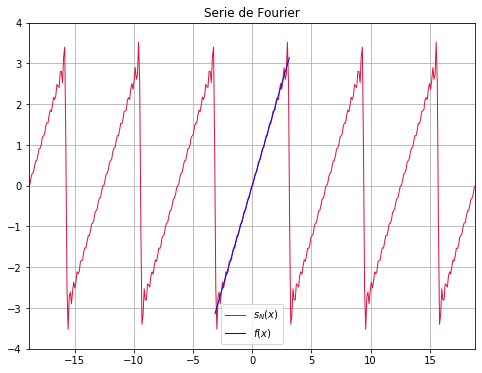

In [9]:
# pour tracer des courbes
import matplotlib.pyplot as plt
sample = lambda vx,p : [p.subs({x:i}) for i in vx]

def plot2(sN, f):
    sx = np.linspace(-6*np.pi, 6*np.pi, 400)
    sy = sample(sx,sN)

    fx = np.linspace(-np.pi, np.pi, 400)
    fy = sample(fx,f)

    plt.figure(figsize=(8, 6))
    plt.plot(sx, sy, linewidth=1 , color='crimson' ,label='$s_N(x)$')
    plt.plot(fx, fy, linewidth=1 , color='blue' ,label='$f(x)$')
    plt.title('Serie de Fourier')
    plt.grid()
    plt.axis([-6*np.pi, 6*np.pi, -4, 4])
    plt.legend()
    plt.show()
plot2(sN,f)